In [1]:
import numpy as np
from gaussian_processes import gp_regression
from gp_plot import plot_gp

# Kernels

In the regression and classification notebook, we have performed inference using Gaussian Processes using the RBF kernel, which is the most widely used and popular kernel even beyond GPs. However, the Gaussian kernel is not the only kernel that we can use in computing the covariance matrix $K$, which we know largely determines our function class and it's prior distribution. In this notebook, you shall see some of the other kernels that have been popularized and used to a great extent in GPs.

For visual reference and comparison, the first kernel displayed below shall be the Gaussian kernel as used in the previous 2 notebooks. We shall also use the example from GP Regression for visualisation.

For more detail, see Chapter 4 on Covariance Functions in the GPML textbook

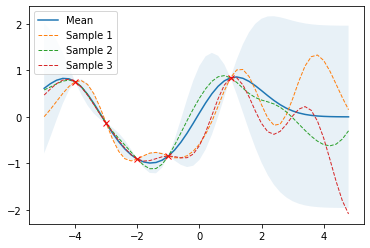

In [2]:
from kernels import rbf

# GP Regression using RBF kernel
X = np.arange(-5, 5, 0.2).reshape(-1, 1)
X_train = np.array([-4., -3., -2., -1., 1.]).reshape(-1, 1)
y_train = np.sin(X_train)

mu_s, cov_s = gp_regression(X_train, y_train, X)

# Posterior plot
samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, 3)
plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=y_train, samples=samples)

## Polynomial Kernel

The polyonimal kernel is also another well known kernel for being able to map higher dimensional features while operating and performing computations at the input dimension. The polynomial kernel is defined as such:

$$
\begin{equation*}
k(x, x) = (\langle x, x' \rangle) + b)^{d}
\end{equation*}
$$

where $b$ is a bias term and $d$ the feature dimension. In the example below, we use the default $b=1$ and dimension $d=2$.

/home/wychoong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  import sys
/media/wychoong/New Volume/GPML/gp_plot.py:10: RuntimeWarning: invalid value encountered in sqrt
  uncertainty = 1.96 * np.sqrt(np.diag(cov))


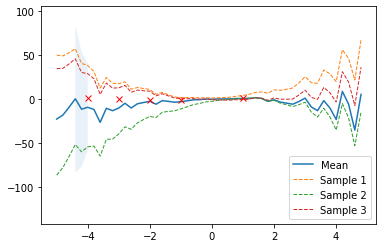

In [3]:
# Using polynomial kernel of order 3
from kernels import poly

mu_s, cov_s = gp_regression(X_train, y_train, X, kernel='poly', order=2.)

# # Posterior plot
samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, 3)
plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=y_train, samples=samples)

## Matern Kernel

The Matern kernel is a popular class of kernels in the area of GP. In the example below, we shall see that unlike the RBF kernel, the Matern kernel is less smooth, which is controlled to a certain extent by the $\nu$ parameter. The general formula for the Matern kernel is:

$$
\begin{equation*}
k(x, x) = \frac{2^{1-\nu}}{\Gamma(\nu)}\left( \frac{\sqrt{2\nu }r}{l}^{\nu} K_{\nu}(\frac{\sqrt{2\nu}r}{l}) \right)
\end{equation*}
$$

where $l$ is the length scale analogous to that in the RBF kernel, and $K_{\nu}$ a modified Bessel function. In particular, the Matern kernel takes on a special form if $\nu = p + 0.5$ for an integer valued $p$:

$$
\begin{equation*}
k_{\nu = p + 0.5}(x, x) = \exp\left(- \frac{\sqrt{2\nu}r}{l} \right) \frac{\Gamma(p + 1)}{\Gamma(2p + 1)} \sum^p_{i=1} \frac{(p+i)!}{i!(p-i)!} \left(\frac{\sqrt{8\nu}r}{l} \right)^{p-i}
\end{equation*}
$$

And the most interesting cases are when $\nu = 1.5, \nu = 2.5$, giving rise to:

$$
\begin{equation*}
k_{\nu = 1.5}(x, x) = \left( 1 + \frac{\sqrt{3}r}{l} \right) \exp \left(- \frac{\sqrt{3}r}{l} \right)
\end{equation*}
$$
$$
\begin{equation*}
k_{\nu = 2.5}(x, x) = \left( 1 + \frac{\sqrt{5}r}{l} + \frac{5r^2}{3l^2} \right) \exp \left(- \frac{\sqrt{5}r}{l} \right)
\end{equation*}
$$

/media/wychoong/New Volume/GPML/gp_plot.py:10: RuntimeWarning: invalid value encountered in sqrt
  uncertainty = 1.96 * np.sqrt(np.diag(cov))
/media/wychoong/New Volume/GPML/gp_plot.py:10: RuntimeWarning: invalid value encountered in sqrt
  uncertainty = 1.96 * np.sqrt(np.diag(cov))


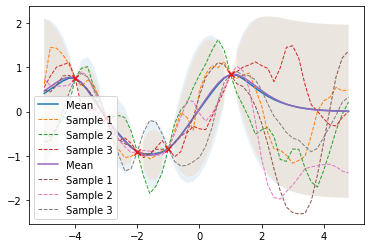

In [4]:
# Using Matern kernel
from kernels import matern


mu_s, cov_s = gp_regression(X_train, y_train, X, kernel='matern', nv=1.5, sigma=1e-03)

# Posterior plot
samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, 3)
plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=y_train, samples=samples)

mu_s, cov_s = gp_regression(X_train, y_train, X, kernel='matern', nv=2.5, sigma=1e-03)

samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, 3)
plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=y_train, samples=samples)

## Exponential Sine Squared

The exponential sine squared kernel is a result of mapping of the input $x$ to a two dimensional periodic random function $(\sin(x), \cos(x))$, which gives:

$$
\begin{equation*}
k(x, x) = \exp \left(- \frac{2 \sin^2(\frac{x - x'}{2})}{l^2} \right)
\end{equation*}
$$

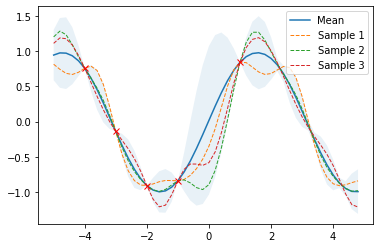

In [5]:
# Using Exponential Sine Squared kernel
from kernels import exp_sin_sq

mu_s, cov_s = gp_regression(X_train, y_train, X, kernel='exp_sin_sq')

# Posterior plot
samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, 3)
plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=y_train, samples=samples)

## Neural Network Covariance Function

Perhaps one of the more interesting covariance functions is one where the assumption on the prior is that the function $f^*$ is perhaps modelled as a multilayer perceptron with hidden units $h$, and each hidden unit has random weights incoming into it represented as a vector $u$ where each entry $u_i \in \mathcal{N}(0, \Sigma)$ is normally distributed. Then, we have that the covariance function for the prior distribution on $f$ is:

$$
\begin{equation*}
k(x, x) = \frac{2}{\pi} \sin^{-1} \left( \frac{2x^T\Sigma x'}{\sqrt{(1 + 2x^T\Sigma x)(1 + 2x'^T\Sigma x')}} \right)
\end{equation*}
$$

For simplicity, we set the covariance matrix on the prior on the neural network weights $u_i$, $\Sigma = I$ where each weight is independent on the other.

/media/wychoong/New Volume/GPML/gp_plot.py:10: RuntimeWarning: invalid value encountered in sqrt
  uncertainty = 1.96 * np.sqrt(np.diag(cov))


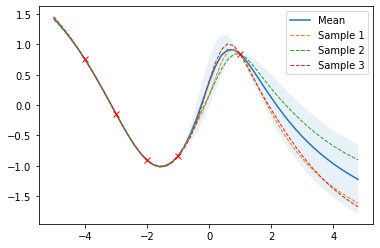

In [6]:
# Using Neural Network kernel
from kernels import nn

mu_s, cov_s = gp_regression(X_train, y_train, X, kernel='nn')

# Posterior plot
samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, 3)
plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=y_train, samples=samples)